In [6]:
#Question 1
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Step 2 & 3: Import the dataset fom the adress given and assign it to a variable called users
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

# Step 4: Mean age per occupation
promedioedad_por_ocupacion = users.groupby('occupation')['age'].mean().round(2)

# Step 5: Male ratio per occupation sorted from most to least
radio_hombres = users.groupby('occupation')['gender'].apply(
    lambda x: (x == 'M').sum() / x.count() * 100
).round(2).sort_values(ascending=False)

# Step 6: Minimum and maximum ages per occupation
rangomin_and_max_ocupacion = users.groupby('occupation')['age'].agg(['min', 'max'])

# Step 7: Mean age for each combination of occupation and sex
promedioedad_sexo_ocupacion = users.groupby(['occupation', 'gender'])['age'].mean().round(2)

# Step 8: Percentage of women and men per occupation
porcentaje_genero = users.groupby(['occupation', 'gender'])['gender'].count().unstack()
porcentaje_genero.fillna(0, inplace=True)
porcentaje_genero['Male %'] = (porcentaje_genero['M'] / porcentaje_genero.sum(axis=1) * 100).round(2)
porcentaje_genero['Female %'] = (porcentaje_genero['F'] / porcentaje_genero.sum(axis=1) * 100).round(2)

# Here are the results
print("Mean Age per Occupation:\n",promedioedad_por_ocupacion )
print("\nMale Ratio per Occupation:\n", radio_hombres)
print("\nMinimum and Maximum Ages per Occupation:\n", rangomin_and_max_ocupacion)
print("\nMean Age by Occupation and Gender:\n", promedioedad_sexo_ocupacion)
print("\nPercentage of Men and Women per Occupation:\n", porcentaje_genero[['Male %', 'Female %']])



Mean Age per Occupation:
 occupation
administrator    38.75
artist           31.39
doctor           43.57
educator         42.01
engineer         36.39
entertainment    29.22
executive        38.72
healthcare       41.56
homemaker        32.57
lawyer           36.75
librarian        40.00
marketing        37.62
none             26.56
other            34.52
programmer       33.12
retired          63.07
salesman         35.67
scientist        35.55
student          22.08
technician       33.15
writer           36.31
Name: age, dtype: float64

Male Ratio per Occupation:
 occupation
doctor           100.00
engineer          97.01
technician        96.30
retired           92.86
programmer        90.91
executive         90.62
scientist         90.32
entertainment     88.89
lawyer            83.33
salesman          75.00
educator          72.63
student           69.39
other             65.71
marketing         61.54
writer            57.78
none              55.56
administrator     54.43
artist

In [16]:
#Question 2
# Step 1: Import necessary libraries
import pandas as pd

# Step 2 & 3: Import the dataset and assign it to a variable called euro12
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)

# Step 4: Select only the Goal column
goals = euro12['Goals']

# Step 5: How many team participated in the Euro 2012?
numero_equipos = euro12['Team'].nunique()

# Step 6: What is the number of columns in the dataset?
numero_columnas = euro12.shape[1]

# Step 7: Creation of the dataFrame base on the columns Team, Yellow Cards, and Red Cards
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

# Step 8: Sort the teams by Red Cards, then to Yellow Cards
clasificacion_tarjetas = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])

# Step 9: Calculate the mean Yellow Cards given  per team
promedio_amarillas = euro12['Yellow Cards'].mean().round(2)

# Step 10: Filter teams that scored more than 6 goals
mas6_goles = euro12[euro12['Goals'] > 6]['Team']

# Step 11: Select teams that start with G
equipos_inicial_g = euro12[euro12['Team'].str.startswith('G')]['Team']

# Step 12: Select the first 7 columns
primeras7_columnas = euro12.iloc[:, :7]

# Step 13: Select all columns except the last 3
excepto_ultimas3 = euro12.iloc[:, :-3]

# Step 14: Present Shooting Accuracy from England, Italy, and Russia
efectividadtiro_seleccionados = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]

# Here are Results
print("Goals Column:\n", goals)
print("\nNumber of Teams:", numero_equipos)
print("\nNumber of Columns:", numero_columnas)
print("\nDiscipline DataFrame:\n", discipline)
print("\nSorted Teams by Red and Yellow Cards:\n", clasificacion_tarjetas)
print("\nMean Yellow Cards per Team:", promedio_amarillas)
print("\nTeams Scoring More Than 6 Goals:\n", mas6_goles)
print("\nTeams Starting with G:\n", equipos_inicial_g)
print("\nFirst 7 Columns:\n", primeras7_columnas)
print("\nAll Columns Except Last 3:\n", excepto_ultimas3)
print("\nShooting Accuracy from Selected Teams:\n", efectividadtiro_seleccionados)



Goals Column:
 0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

Number of Teams: 16

Number of Columns: 35

Discipline DataFrame:
                    Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14          

In [18]:
#Question 3
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Step 2: Create 3 different Series,each of length 100
series1 = pd.Series(np.random.randint(1, 5, 100))#1 to 4
series2 = pd.Series(np.random.randint(1, 4, 100))#1 to 3
series3 = pd.Series(np.random.randint(10000, 30001, 100))#10000 to 30000

# Step 3: Create a DataFrame by joining the Series by column
housing = pd.concat([series1, series2, series3], axis=1)

# Step 4: Rename the columns
housing.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

# Step 5: Create a one-column DataFrame with the value of 3 series and assign it to "bigcolumn"
bigcolumn = pd.concat([series1, series2, series3], axis=0).to_frame(name='bigcolumn')

# Step 6: Check if the index going only until index99
print("Does the index stop at 99?", bigcolumn.index.max() == 99)

# Step 7: Reindex the DataFrame from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)

# Here are Results
print("\nHousing DataFrame:\n", housing.head())
print("\nBigcolumn DataFrame (Reindexed):\n", bigcolumn)


Does the index stop at 99? True

Housing DataFrame:
    bedrs  bathrs  price_sqr_meter
0      2       3            26994
1      2       2            12883
2      2       3            11453
3      4       2            11389
4      3       3            19696

Bigcolumn DataFrame (Reindexed):
      bigcolumn
0            2
1            2
2            2
3            4
4            3
..         ...
295      16139
296      16030
297      23636
298      27007
299      23594

[300 rows x 1 columns]


In [112]:
#Question 4
#Step 1: Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Import the dataset
def load_wind_data(file_path):
    """Load wind data from a text file"""
    return pd.read_csv(file_path, sep=r'\s+', 
                       names=['Year', 'Month', 'Day', 'RPT', 'VAL', 'ROS', 'KIL', 
                              'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL'])

# Step 3 & 4: Assign to the variable called data , replacing 3 first columns, correcting the data for 2061
def prepare_datetime(df):
    """
    Convert year, month, day to datetime index
    Correct two-digit year representation
    """
    
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df['Month'] = pd.to_numeric(df['Month'], errors='coerce')
    df['Day'] = pd.to_numeric(df['Day'], errors='coerce')
    
    # Fixing the year, changing it for 1961
    def fix_year(year):
        if pd.isna(year):
            return year
        year = int(year)
        return year + 1900 if year < 100 else year
    
    df['Year'] = df['Year'].apply(fix_year)
    
    # Create datetime index
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    
    # Set datetime as index and drop original date columns
    data = df.set_index('Date')
    data = data.drop(columns=['Year', 'Month', 'Day'])
    
    # Sort the index
    data = data.sort_index()
    
    # Convert numeric columns
    numeric_columns = ['RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 
                       'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']
    data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    return data

# Load and prepare the data
data = prepare_datetime(load_wind_data('wind.txt'))

# Step 6: Analyzing missing values for each location
valores_perdidos = data.isnull().sum()
print("Missing Values per Location:")
print(valores_perdidos)

# Step 7: Compute how many non-missing values are
valores_noperdidos = data.count().sum()
print("\nTotal Non-Missing Values:", valores_noperdidos)

# Step 8: Measn windspeed of all the locations and times
media_total_vientos = data.mean().mean()
print("\nOverall Mean Windspeed:", media_total_vientos)

# Step 9: Dataframe with location statistics
loc_stats = pd.DataFrame({
    'Min': data.min(),
    'Max': data.max(),
    'Mean': data.mean(),
    'Std': data.std()
})
print("\nLocation Statistics:")
print(loc_stats)

# Step 10: Daily Statistics
day_stats = pd.DataFrame({
    'Min': data.min(axis=1),
    'Max': data.max(axis=1),
    'Mean': data.mean(axis=1),
    'Std': data.std(axis=1)
})
print("\nDaily Statistics:")
print(day_stats.head())

# Step 11: Average windspeed in January for locations
def january_windspeed(df):
    """Calculate average windspeed for all Januaries"""
    january_data = df[df.index.month == 1]
    return january_data.mean()

january_avg = january_windspeed(data)
print("\nJanuary Average Windspeeds:")
print(january_avg)

# Step 12-14: Downsampling to a yearly, monthly, weekly
anual = data.resample('YE').mean()
mensual = data.resample('ME').mean()
semanal = data.resample('W').mean()

print("\nYearly Downsample:")
print(anual)

print("\nMonthly Downsample:")
print(mensual.head())

print("\nWeekly Downsample:")
print(semanal.head())

# Step 15: Weekly Statistics for First 52 Weeks

primer_anual = data[data.index.year == 1961]
primeras52_anuales = primer_anual.resample('W').agg(['min', 'max', 'mean', 'std'])
print("\nWeekly Statistics (First 52 Weeks):")
print(primeras52_anuales)

Missing Values per Location:
RPT    7
VAL    4
ROS    3
KIL    6
SHA    3
BIR    1
DUB    4
CLA    3
MUL    4
CLO    2
BEL    1
MAL    5
dtype: int64

Total Non-Missing Values: 78857

Overall Mean Windspeed: 10.227982360836938

Location Statistics:
      Min    Max       Mean       Std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Daily Statistics:
             Min    Max       Mean       Std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1

In [40]:
#Question 5
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Import the dataset from the given URL
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

# Step 4: See the first 10 entries
print("First 10 entries:\n", chipo.head(10))

# Step 5: What is the number of observations in the dataset?
numero_observaciones = chipo.shape[0]
print("\nNumber of observations:", numero_observaciones)

# Step 6: What is the number of columns in the dataset?
numero_columnas = chipo.shape[1]
print("\nNumber of columns:",numero_columnas)

# Step 7: Print the name of all the columns
print("\nColumns names:", chipo.columns.tolist())

# Step 8: How is the dataset indexed?
print("\nDataset indexed by:", chipo.index)

# Step 9: Which was the most-ordered item?
mayor_ordenado = chipo['item_name'].value_counts().idxmax()
print("\nMost ordered item:", mayor_ordenado)

# Step 10: For the most-ordered item, how many items were ordered?
mayor_ordenado_cantidad = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print("\nNumber of items ordered for the most ordered item:", mayor_ordenado_cantidad)

# Step 11: What was the most ordered item in the choice_description column?
mas_ordenado_opcion_descripcion = chipo['choice_description'].value_counts().idxmax()
print("\nMost ordered item in the choice_description column:", mas_ordenado_opcion_descripcion)

# Step 12: How many items were ordered in total?
total_ordenado = chipo['quantity'].sum()
print("\nTotal items ordered:", total_ordenado)

# Step 13: Turn the item price into a float using raw strings
chipo['item_price'] = chipo['item_price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)

# Check the item price type
print("\nItem price type after conversion:", chipo['item_price'].dtype)

# Create a lambda function and change the type of item price
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))

# Check the item price type
print("\nItem price type after lambda function:", chipo['item_price'].dtype)

# Step 14: How much was the revenue for the period in the dataset?
ingresos = (chipo['item_price'] * chipo['quantity']).sum()
print("\nTotal revenue for the period:", ingresos)

# Step 15: How many orders were made in the period?
numero_ordenes = chipo['order_id'].nunique()
print("\nNumber of orders:", numero_ordenes)

# Step 16: What is the average revenue amount per order?
promedio_ingreso_por_orden = ingresos / numero_ordenes
print("\nAverage revenue per order:", promedio_ingreso_por_orden)

# Step 17: How many different items are sold?
productos_diferentes = chipo['item_name'].nunique()
print("\nNumber of different items sold:", productos_diferentes)



First 10 entries:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3           

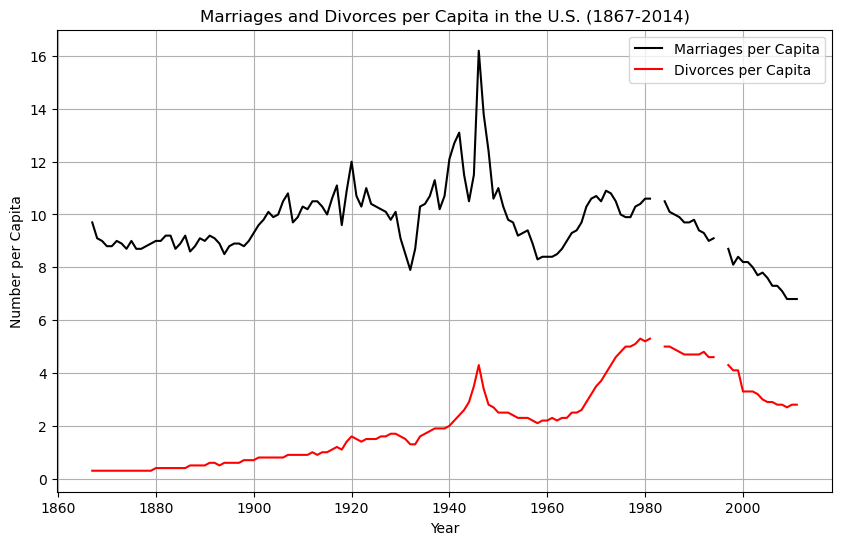

In [50]:
#Question 6
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
#Analyze and verify the columns names are correct
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per Capita', color='black')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per Capita', color='red')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Number per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()
plt.grid(True)

#Here we have our plot
plt.show()


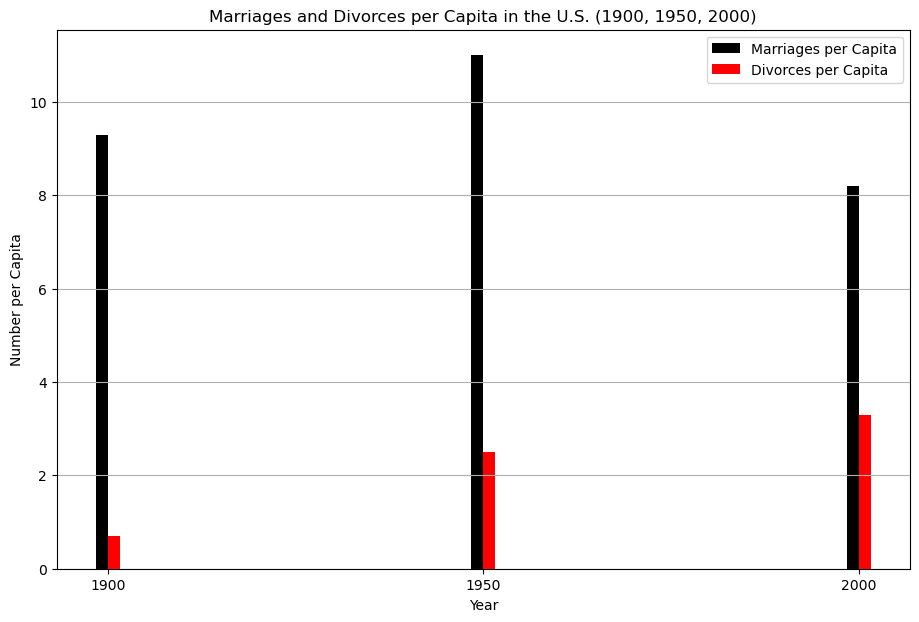

In [64]:
#Question 7
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Filter data for the years 1900, 1950, and 2000
filtered_data = data[data['Year'].isin([1900, 1950, 2000])]
#Analyze and verify the columns names are correct

# Create the bar chart
bar_width = 1.6
x = filtered_data['Year']

plt.figure(figsize=(11, 7))
plt.bar(x - bar_width/2, filtered_data['Marriages_per_1000'], width=bar_width, label='Marriages per Capita', color='black')
plt.bar(x + bar_width/2, filtered_data['Divorces_per_1000'], width=bar_width, label='Divorces per Capita', color='red')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Number per Capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)')
plt.xticks(ticks=filtered_data['Year'], labels=filtered_data['Year'])
plt.legend()
plt.grid(axis='y')

# Here we have our plot
plt.show()


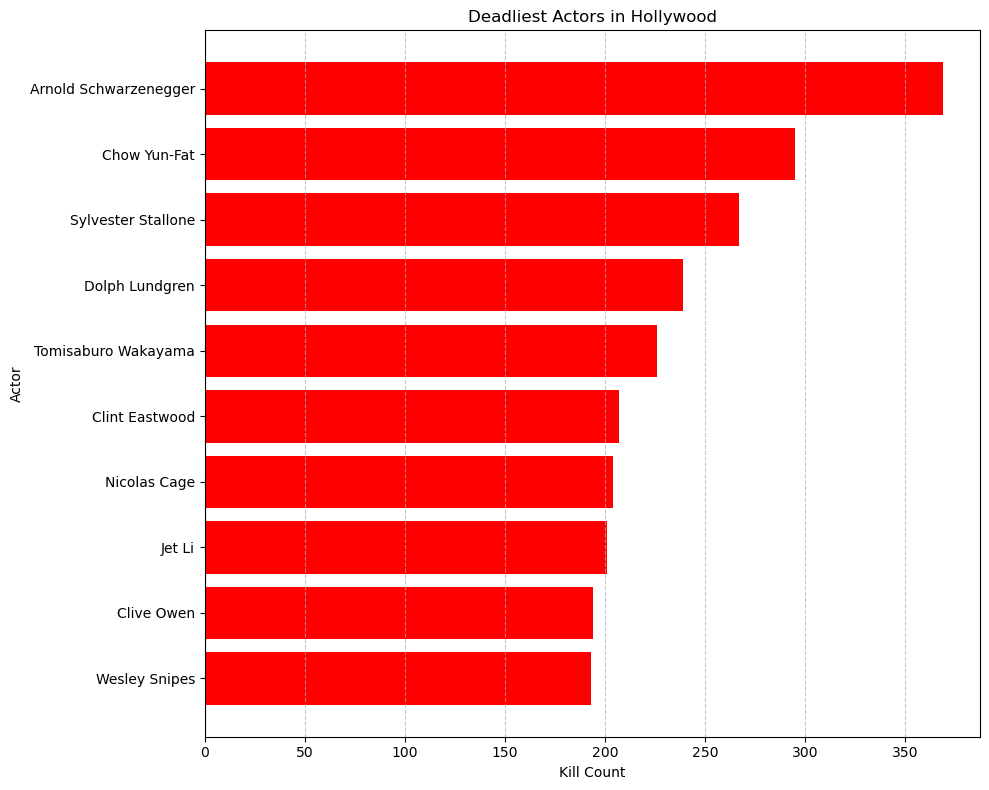

In [76]:
#Question 8
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('actor_kill_counts.csv')

# Sort the data by kill count
data_sorted = data.sort_values(by='Count', ascending=True)

# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(data_sorted['Actor'], data_sorted['Count'], color='red')

# Add labels, title, and grid
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Here we have the our plot
plt.tight_layout()
plt.show()

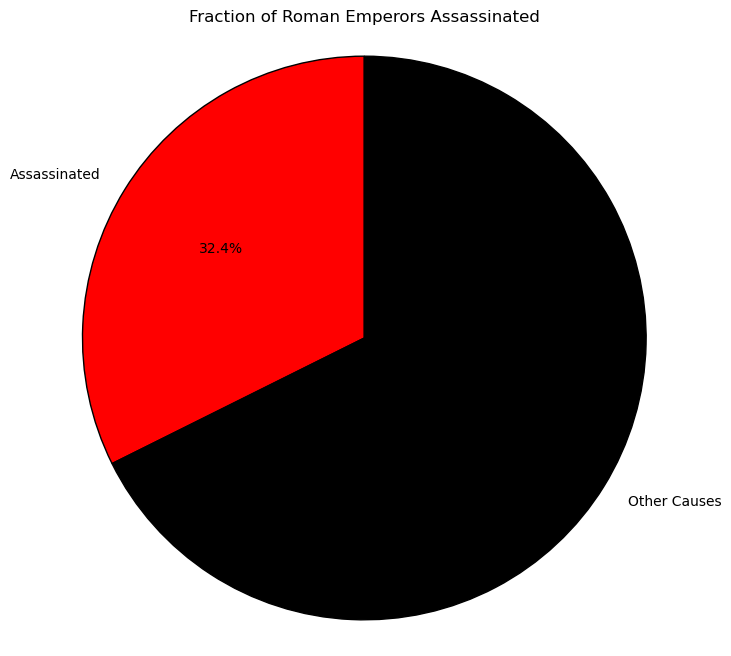

In [88]:
#Question 9
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
data = pd.read_csv('roman-emperor-reigns.csv')

# Count the number of emperors who were assassinated
conteo_asesinatos = data['Cause_of_Death'].value_counts().get('Assassinated', 0)

# Calculate total emperors and other causes
total_emperadores = len(data)
otras_causas = total_emperadores - conteo_asesinatos

# Check label, size colors
labels = ['Assassinated', 'Other Causes']
sizes = [conteo_asesinatos, otras_causas]
colors = ['red', 'black']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, 
        wedgeprops={"edgecolor": "black"})
plt.title('Fraction of Roman Emperors Assassinated')
plt.axis('equal') 

# Here we have our  chart
plt.show()


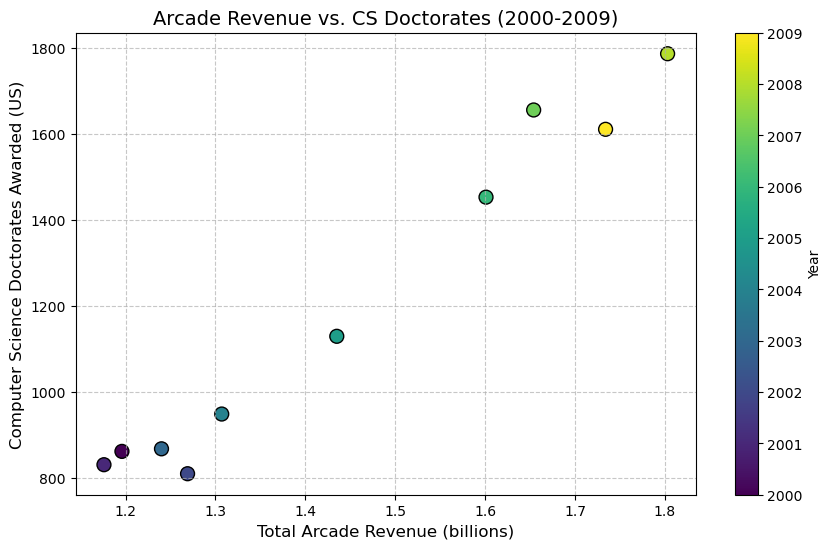

In [96]:
#Question 10
#Import neccesary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file

data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Analyze the relevant data for answering the question
x = data['Total Arcade Revenue (billions)']
y = data['Computer Science Doctorates Awarded (US)']
years = data['Year']

# Create the scatter plot
plt.figure(figsize=(10, 6))
grafico = plt.scatter(x, y, c=years, cmap='viridis', edgecolor='k', s=100)

# Coloring each dot according to its year
cbar = plt.colorbar(grafico)
cbar.set_label('Year')

# Checking labels and axis
plt.xlabel('Total Arcade Revenue (billions)', fontsize=12)
plt.ylabel('Computer Science Doctorates Awarded (US)', fontsize=12)
plt.title('Arcade Revenue vs. CS Doctorates (2000-2009)', fontsize=14)

# Here we have our plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
